In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv('../chap03/data/iris.data', names=names) 

# Supevised Learning

## K-nearest neighborhood

In [2]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.20)

In [4]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [6]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test,y_pred)))

정확도: 0.8333333333333334


In [7]:
k =10
acc_array = np.zeros(k)

for k in np.arange(1,k+1,1):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc
    
max_acc = np.amax(acc_array)
acc_list= list(acc_array)
k=acc_list.index(max_acc)
print('정확도', max_acc,'으로 최적의 k는', k+1,'입니다.')

정확도 0.9 으로 최적의 k는 7 입니다.


## Support Vector Machine

In [8]:
from sklearn import svm, metrics,datasets,model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']= '3'

In [9]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size =0.6, random_state=42)

In [10]:
Svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5) #C: missclassify 허용치 -> 낮으면 많이 허용, gamma: curvature -> 높으면 더 구불구불
Svm.fit(X_train, y_train)
predictions =Svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'.format(score))

정확도: 0.988889


In [11]:
Svm = svm.SVC(kernel='poly', C=1.0, gamma=0.5) #C: missclassify 허용치 -> 낮으면 많이 허용, gamma: curvature -> 높으면 더 구불구불
Svm.fit(X_train, y_train)
predictions =Svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'.format(score))

정확도: 0.988889


## Decision Tree

### Impurity minimize 
### impurity measure: entorpy, Gini index

In [12]:
import pandas as pd
df = pd.read_csv('../chap03/data/titanic/train.csv', index_col='PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [13]:
df =df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Survived']]
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df=df.dropna()
X = df.drop('Survived', axis=1)
y = df['Survived']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [15]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [16]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8100558659217877

In [18]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_predict),
            columns = ['Predcited Not Survival', 'Predicted Survival'],
            index = ['True Not Survival', 'True Survival'])

,Predcited Not Survival,Predicted Survival
True Not Survival,97,15
True Survival,19,48


## Ensemble

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500, #The number of base estimators in the ensemble.
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [21]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

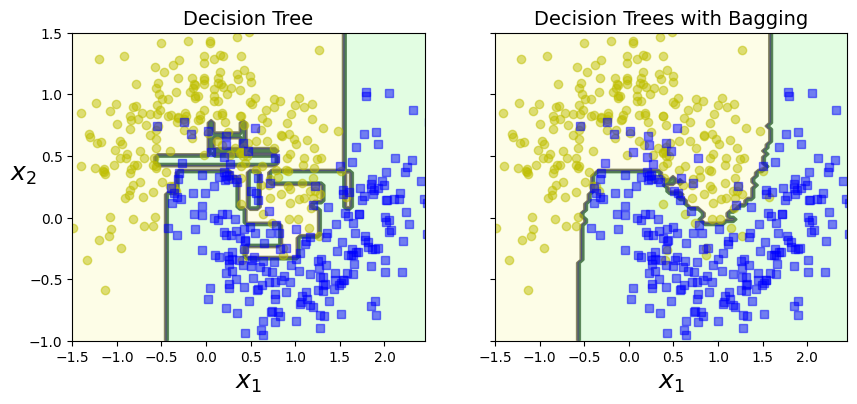

In [23]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True) #bagging이 decision bound가 좀 더 smooth함
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

## Random Forest

In [24]:
import time

start = time.time()

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42)

bag_clf.fit(X_train, y_train)
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

y_pred = bag_clf.predict(X_test)
print(y_pred)

time : 1.0050277709960938
[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 0 0 1 1 1 0 0 0]


In [25]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42,max_features=2)
rnd_clf.fit(X_train, y_train)
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

y_pred_rf = rnd_clf.predict(X_test)
print(y_pred_rf)
print(accuracy_score(y_test, y_pred_rf))

time : 0.9433391094207764
[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 0 0 1 1 1 0 0 0]
0.912


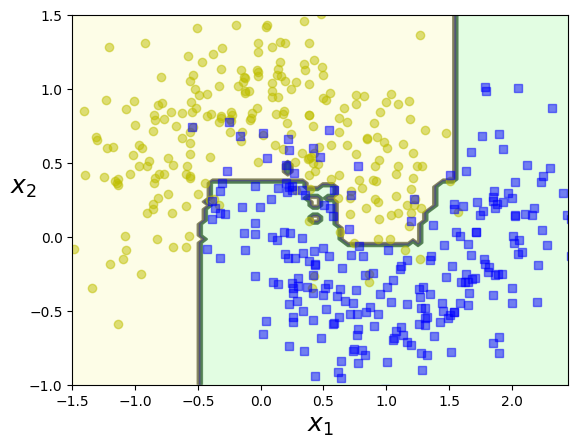

In [26]:
plot_decision_boundary(rnd_clf, X, y)

## Logistic regression

In [27]:
%matplotlib inline
from sklearn.datasets import load_digits
digits =load_digits()
print('Image Data Shape', digits.data.shape)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


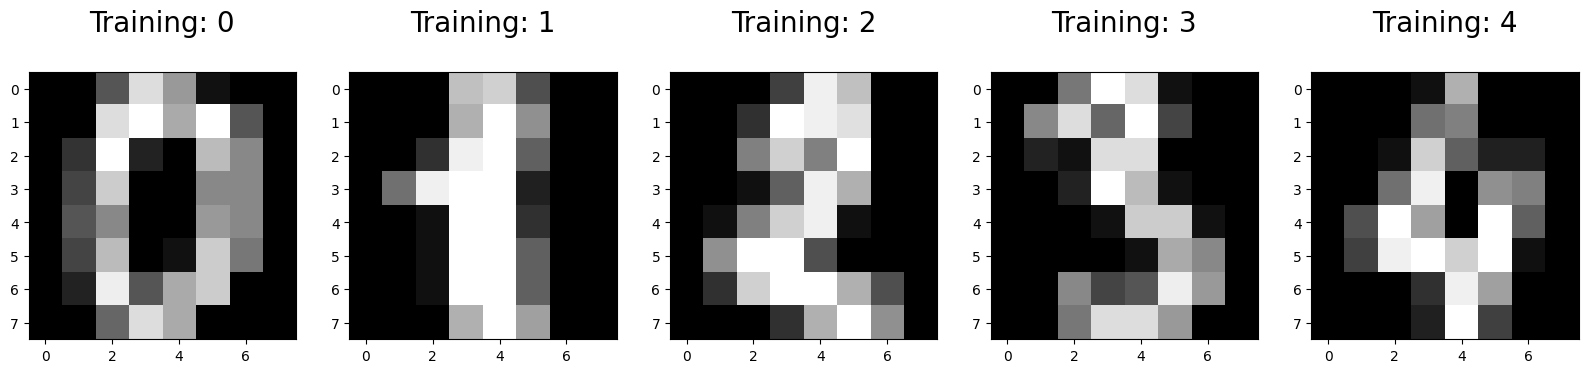

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)

C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [31]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


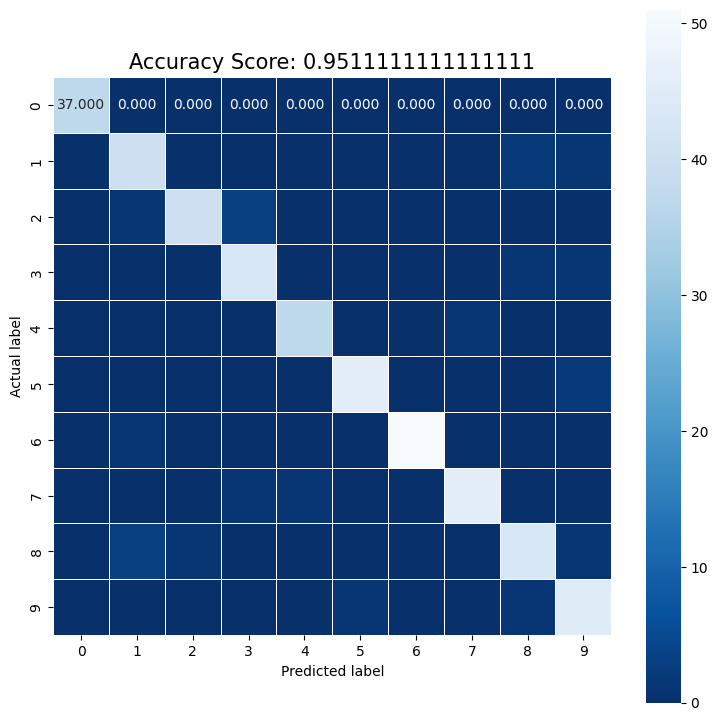

In [32]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);
plt.show();

## Linear regression

In [33]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [34]:
dataset = pd.read_csv('../chap03/data/weather.csv')

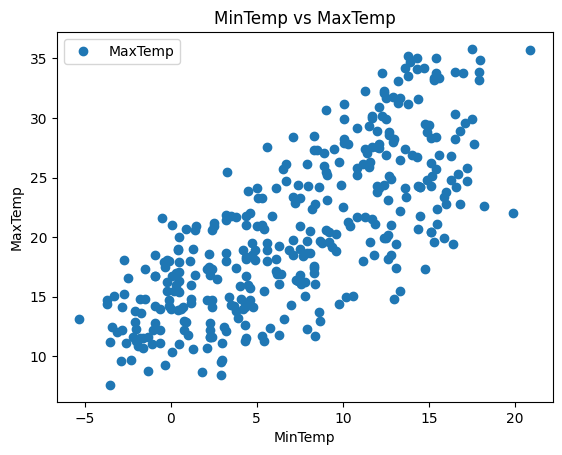

In [35]:
dataset.plot(x='MinTemp', y= 'MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp') 
plt.show()

In [36]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,18.2,19.651336
1,33.8,27.614117
2,29.3,24.274887
3,18.6,16.312106
4,25.1,25.302342
...,...,...
69,28.5,21.535005
70,16.3,14.856544
71,29.6,29.069679
72,15.9,17.853289


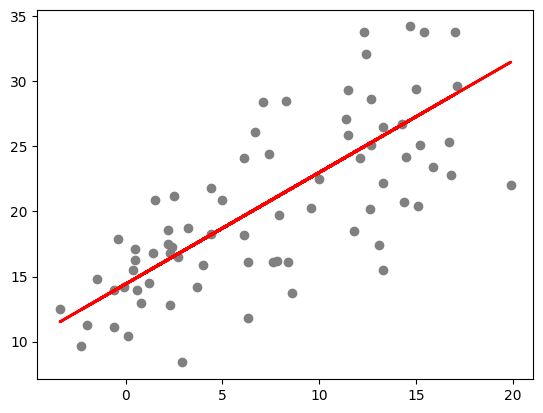

In [38]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

In [39]:
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))  
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 19.665974947738892
루트 평균제곱법: 4.434633575363233


## Lasso

In [40]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=5)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=5)

In [41]:
y_pred_lasso = lasso_reg.predict(X_test)

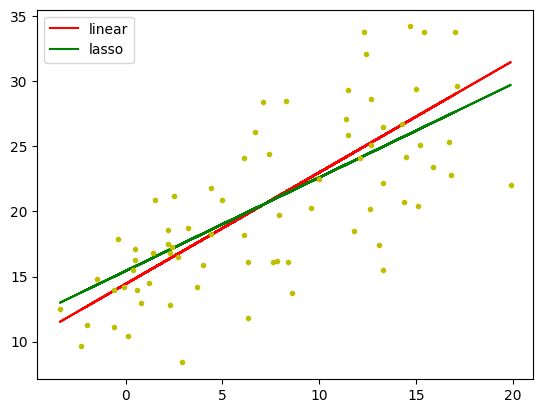

In [42]:
plt.plot(X_test, y_pred, "r-", label="linear")
plt.plot(X_test, y_pred_lasso, "g-", label="lasso")
plt.plot(X_test, y_test, "y.")
plt.legend()
plt.show()

## Ridge

In [43]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=100)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

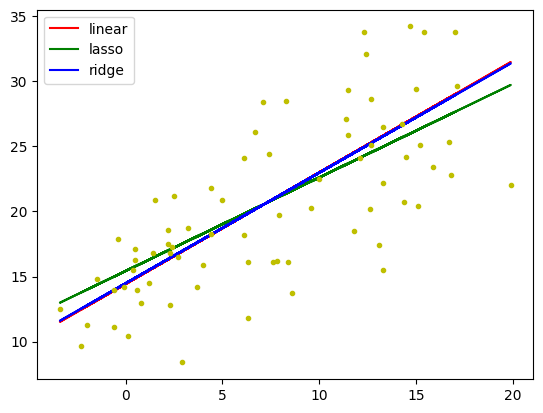

In [44]:
plt.plot(X_test, y_pred, "r-", label="linear")
plt.plot(X_test, y_pred_lasso, "g-", label="lasso")
plt.plot(X_test, y_pred_ridge, "b-", label="ridge")
plt.plot(X_test, y_test, "y.")
plt.legend()
plt.show()

## Polynomial regression

In [45]:
import numpy as np

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

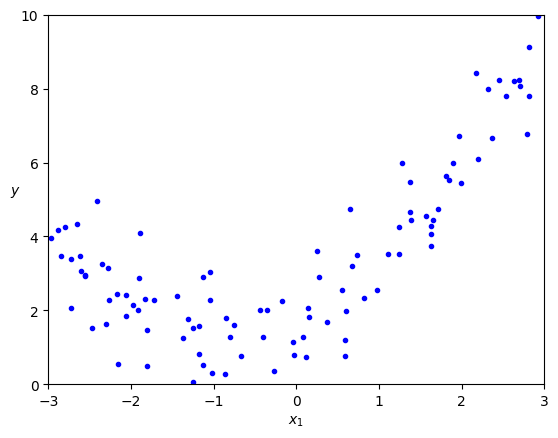

In [46]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.axis([-3, 3, 0, 10])
plt.show()

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [48]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

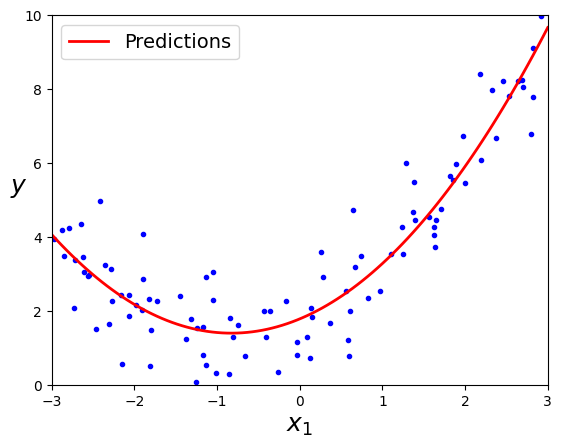

In [49]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)     # 새로운 샘플 100개
X_new_poly = poly_features.transform(X_new)       # 2차 다항 회귀 모델 데이터로 변환
y_new = lin_reg.predict(X_new_poly)               # 예측하기

plt.plot(X, y, "b.")                                            # 기존 데이터 산점도
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")  # 예값 그래프

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

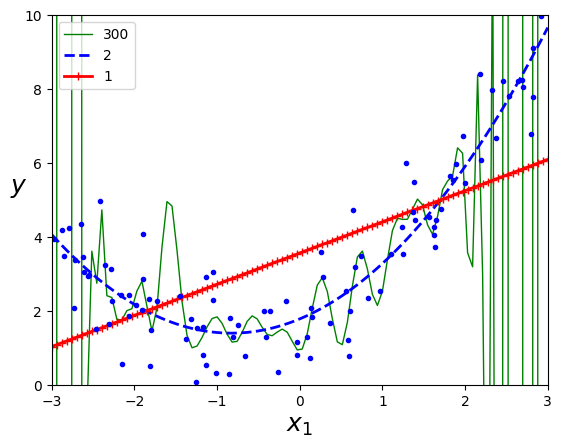

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 세 개의 다항 회귀 모델 지정: 차례 대로 300차 다항 회귀, 2차 다항 회귀, 1차 선형 회귀 모델의 예측값 그래프 그리기
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):   
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)  # 다항 특성 변환기
    std_scaler = StandardScaler()                                             # 표준화 축척 조정
    lin_reg = LinearRegression()                                              # 선형 회귀 모델
    
    polynomial_regression = Pipeline([                         # 파이프라인: 전처리 + 선형 회귀 모델
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)                                            # 훈련
    y_newbig = polynomial_regression.predict(X_new)                            # 예측
    
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)       # 그래프 그리기

plt.plot(X, y, "b.", linewidth=3)                                              # 원 데이터 산점도
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error           # MSE 수동 계산
from sklearn.model_selection import train_test_split     # 무작위 샘플링

def plot_learning_curves(model, X, y):
    # 8:2 로 분류
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []                    # MSE 추적 장치

    for m in range(1, len(X_train)):                     # m 개의 훈련 샘플을 대상으로 훈련
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        # MSE 기록
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)    

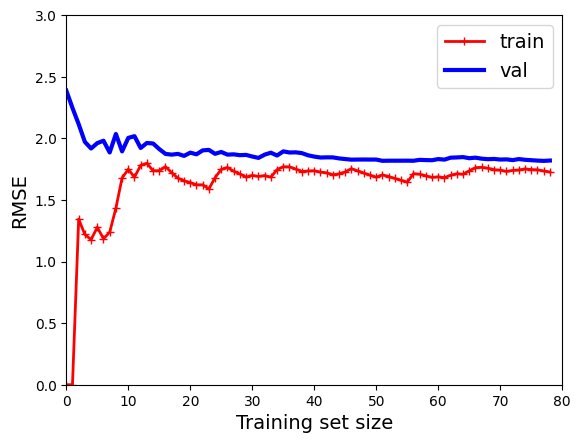

In [52]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()            

# Unsupervised Learning

## K-means clustering

### 데이터가 비선형일 때
### 군집 크기가 다를 때                                                   
### 군집마다 밀집도와 거리가 다를 때
###  -> 부적합

In [53]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [54]:
data =pd.read_csv('../chap03/data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [55]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicasssen']

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col, dtype= int)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col,axis=1,inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [56]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is

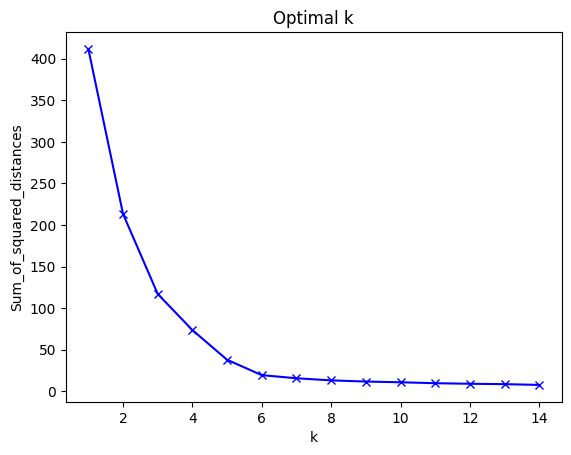

In [57]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

## Density Based Spatial Clustering of Applications with Noise (DBSCAN)

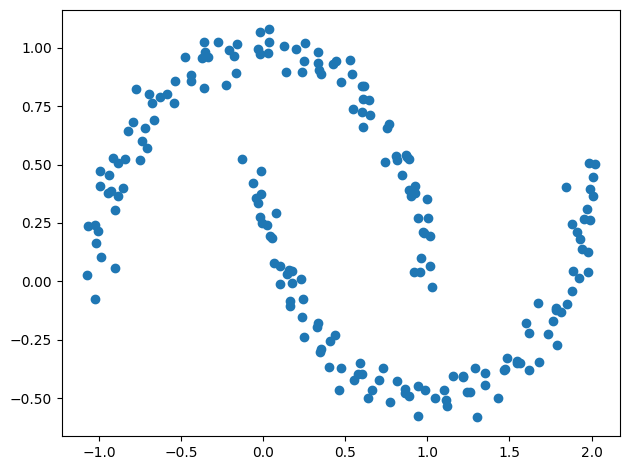

In [58]:
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


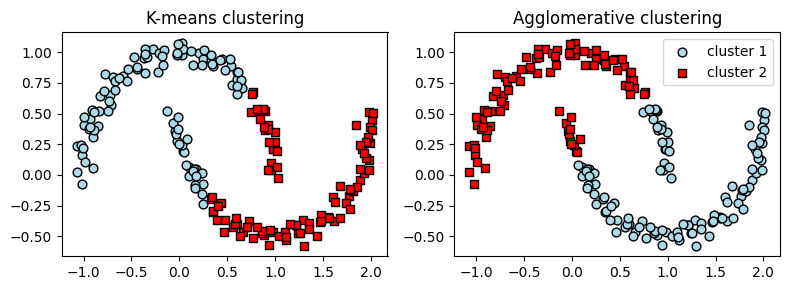

In [59]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
           edgecolor='black',
           c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
           edgecolor='black',
           c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is

Text(0.5, 1.0, '20 K-means clustering')

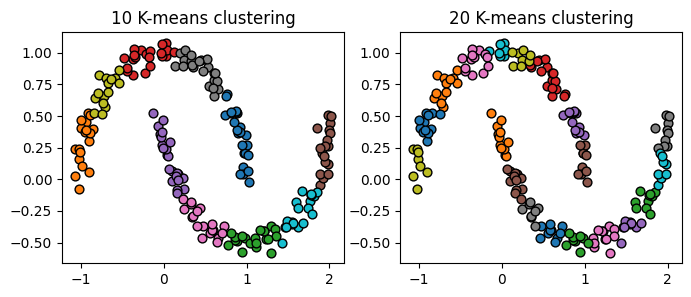

In [60]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=10, random_state=0)
y_km = km.fit_predict(X)
for i in range (10):
    ax1.scatter(X[y_km == i, 0], X[y_km == i, 1],
           edgecolor='black',
            marker='o', s=40, label='cluster'+str(i))
ax1.set_title('10 K-means clustering')

km = KMeans(n_clusters=20, random_state=0)
y_km = km.fit_predict(X)
for i in range (20):
    ax2.scatter(X[y_km == i, 0], X[y_km == i, 1],
           edgecolor='black',
            marker='o', s=40, label='cluster'+str(i))
ax2.set_title('20 K-means clustering')

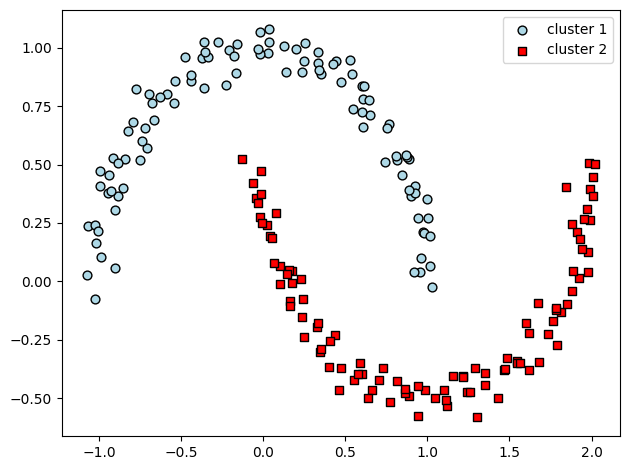

In [61]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

## PCA

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

In [63]:
X = pd.read_csv('../chap03/data/credit card.csv')
X = X.drop('CUST_ID', axis= 1)
X.fillna(method='ffill', inplace=True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268880
3 -0.481656 -0.097609
4 -0.563512 -0.482506


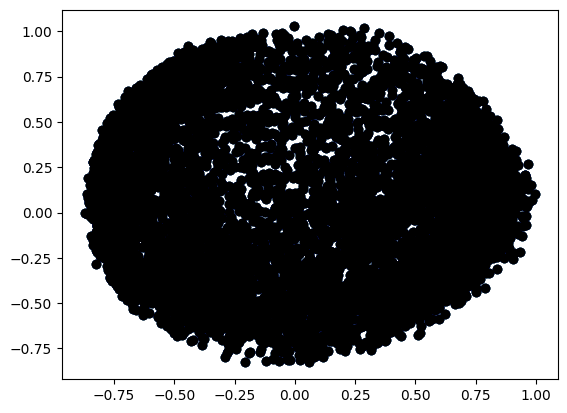

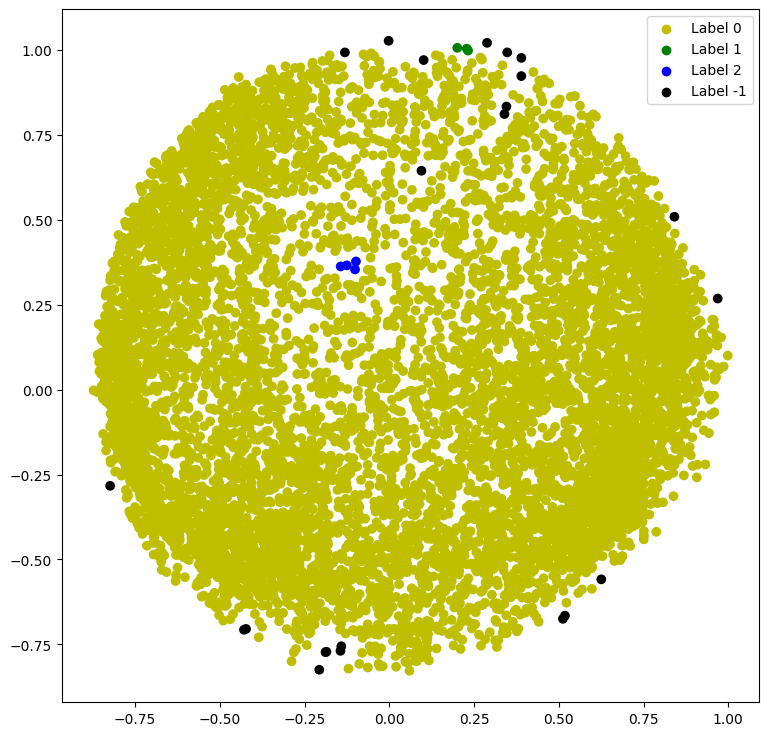

In [65]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)
labels = db_default.labels_

colours={}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1]='k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

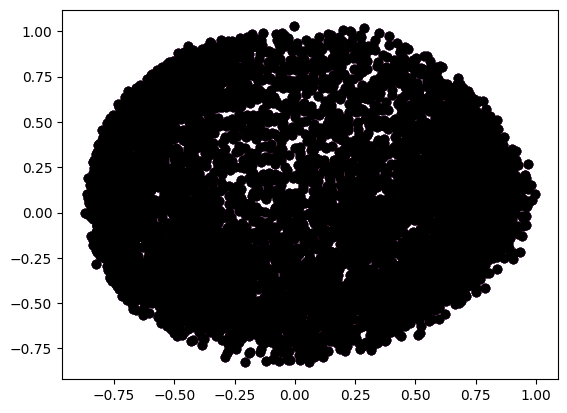

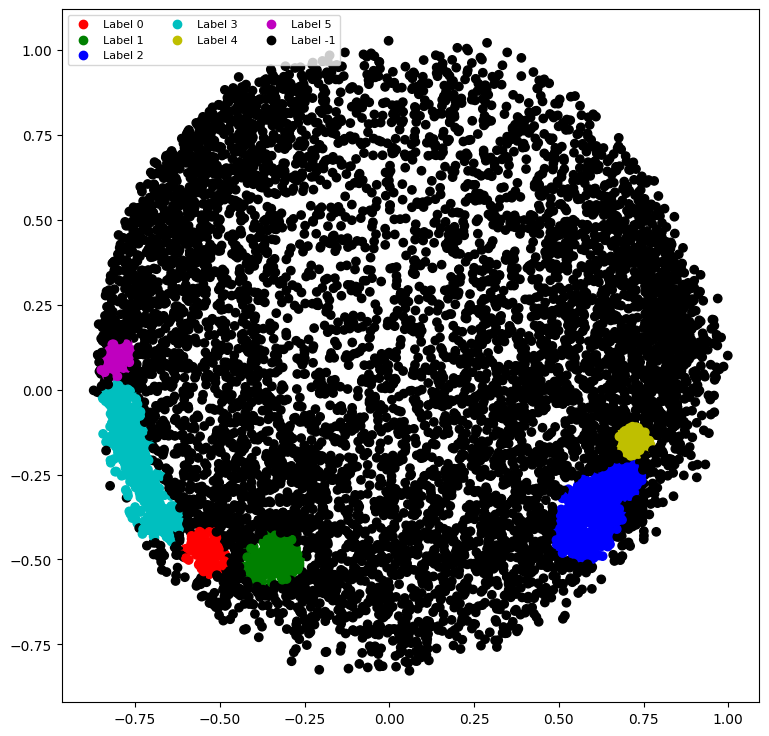

In [66]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()


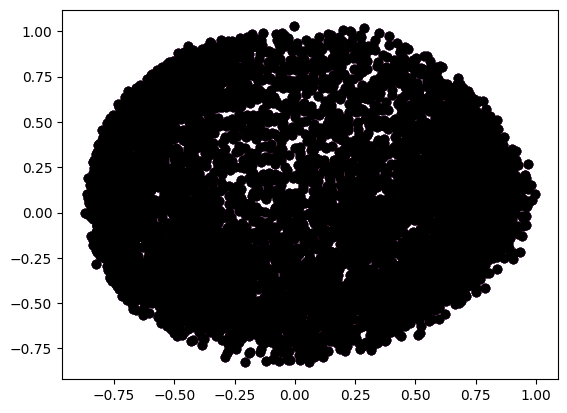

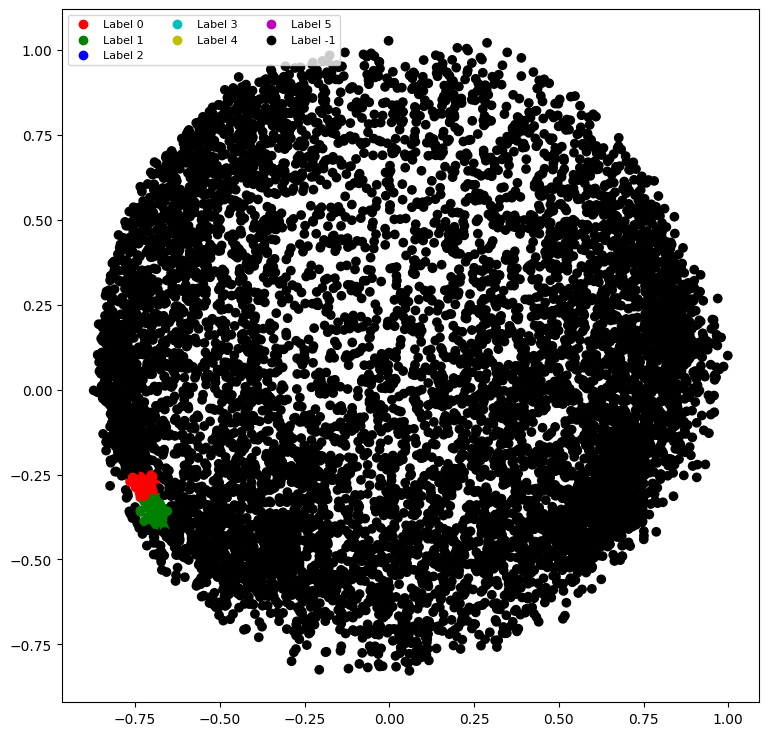

In [67]:
db = DBSCAN(eps = 0.0375, min_samples = 100).fit(X_principal)
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()


## Kernel PCA

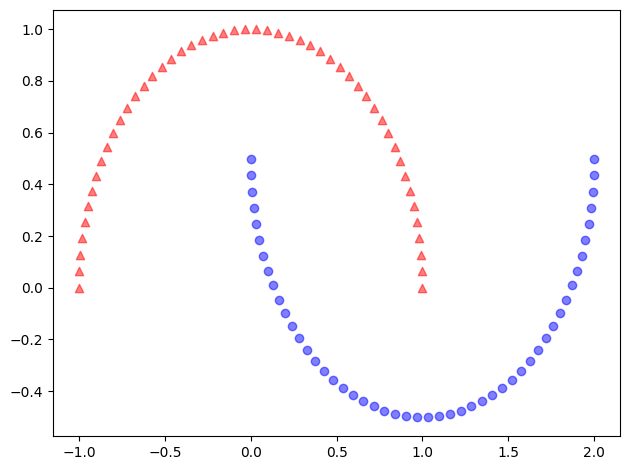

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

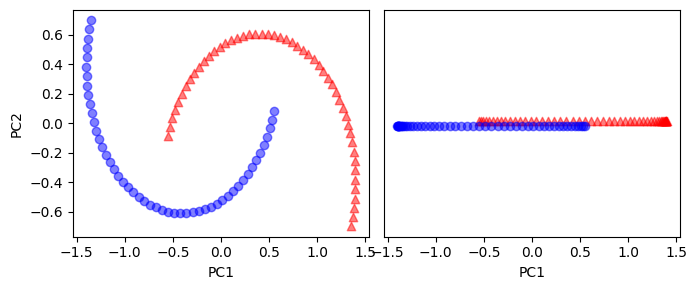

In [69]:
from sklearn.decomposition import PCA

import numpy as np

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

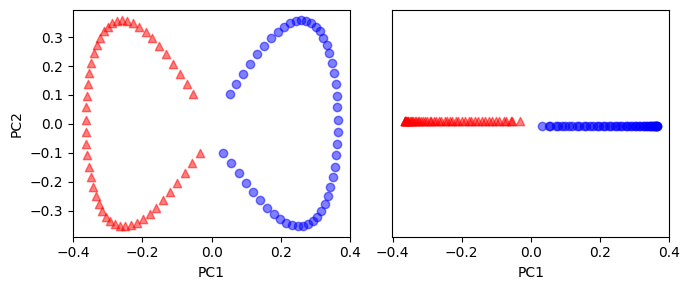

In [70]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel='rbf',gamma=15, n_components=2)
X_kpca=kpca.fit_transform(X)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

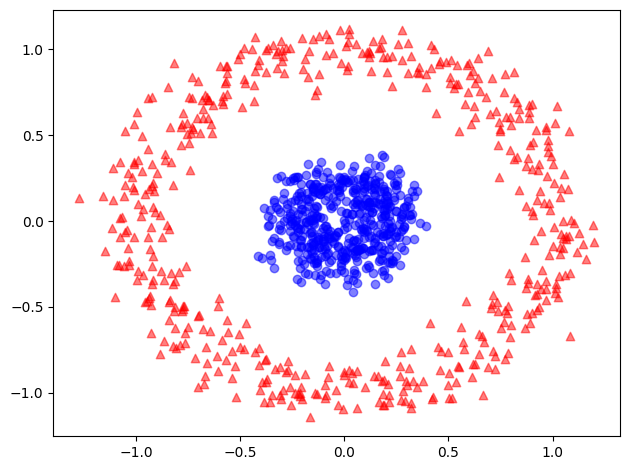

In [71]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
plt.show()

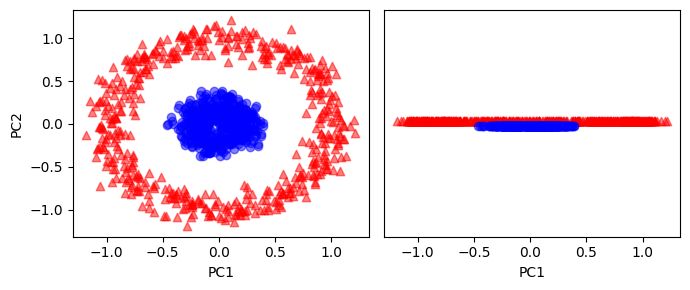

In [72]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

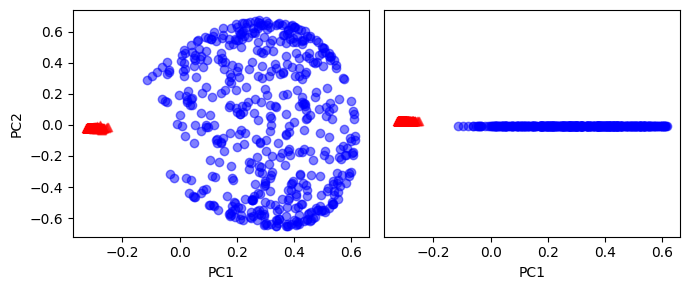

In [73]:
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2)
X_kpca=kpca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

## Manifold Learning

In [74]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Seungyun\anaconda3\envs\pytorch\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


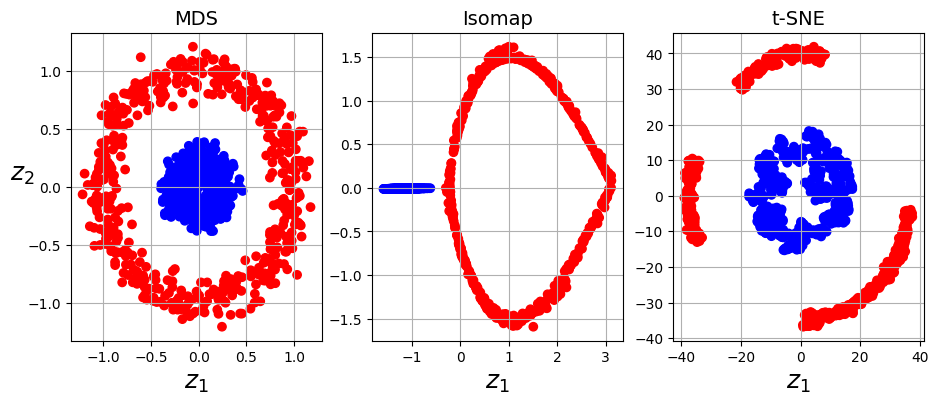

In [75]:
import matplotlib
titles = ["MDS", "Isomap", "t-SNE"]
colors = ["red", "blue"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()